In [8]:
from sklearn import preprocessing
import pandas as pd
import numpy as np # we'll need it later
#Load the Boston dataset.

from sklearn.datasets import load_boston

boston = load_boston()
X,y = boston.data, boston.target

bins = 50*np.arange(8)
binned_y = np.digitize(y, bins)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

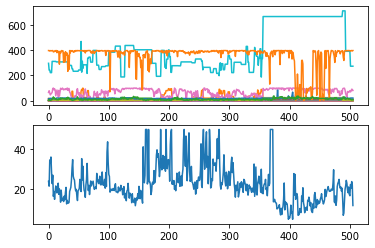

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(211)
plt.plot(X)
plt.subplot(212)
plt.plot(y)

In [10]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

single_estimator = KNeighborsRegressor()
ensemble_estimator = BaggingRegressor(base_estimator = single_estimator)

param_dist = {
 'max_samples': [0.5,1.0],
 'max_features' : [0.5,1.0],
 'oob_score' : [True, False],
 'base_estimator__n_neighbors': [3,5],
 'n_estimators': [100]
 }

pre_gs_inst_bag = RandomizedSearchCV(ensemble_estimator,
 param_distributions = param_dist,
 cv=3,
 n_iter = 5,
 n_jobs=-1)

pre_gs_inst_bag.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=BaggingRegressor(base_estimator=KNeighborsRegressor()),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'base_estimator__n_neighbors': [3, 5],
                                        'max_features': [0.5, 1.0],
                                        'max_samples': [0.5, 1.0],
                                        'n_estimators': [100],
                                        'oob_score': [True, False]})

In [11]:
#slightly diferent from book
pre_gs_inst_bag.best_params_

{'oob_score': False,
 'n_estimators': 100,
 'max_samples': 1.0,
 'max_features': 0.5,
 'base_estimator__n_neighbors': 5}

In [12]:
rs_bag = BaggingRegressor(**{'max_features': 0.5,
 'max_samples': 1.0,
 'n_estimators': 100,
 'oob_score': True,
 'base_estimator': KNeighborsRegressor(n_neighbors=5)})

In [13]:
rs_bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(), max_features=0.5,
                 n_estimators=100, oob_score=True)

In [14]:
y_pred = rs_bag.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error

print("R-squared",r2_score(y_test, y_pred))
print("MAE : ",mean_absolute_error(y_test, y_pred))
print("MAPE : ",(np.abs(y_test - y_pred)/y_test).mean())

R-squared 0.652030865667143
MAE :  3.7671882352941166
MAPE :  0.1540990172462061


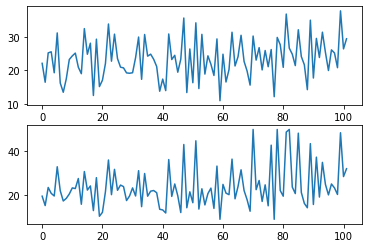

In [16]:
plt.figure()
plt.subplot(211)
plt.plot(y_pred)
plt.subplot(212)
plt.plot(y_test)